In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import os
import random
import torch
from model import ViT16, MobileNetV2, ModelTrainer
import data
from data import TransDataset
import isic2017
import utils

/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [2]:
# to reproduce
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [3]:
batch_size = 32
img_size = (224, 224)
num_class = 3

df_train = isic2017.get_dataset("train")
df_valid = isic2017.get_dataset("valid")
train_loader = data.get_dataloader(df_train, img_size, batch_size, train=True)
valid_loader = data.get_dataloader(df_valid, img_size, batch_size, train=False)

../../dataset/SafeExplain/mobile/ aready exist.
Sub folders of ../../dataset/SafeExplain/mobile/ was deleted.
Epoch: 0 | Validation Accuracy: 0.2800 | Loss: 1.1426 | F1: 0.2009
Epoch: 1 | Validation Accuracy: 0.3133 | Loss: 1.1134 | F1: 0.2502
Epoch: 2 | Validation Accuracy: 0.3200 | Loss: 1.0727 | F1: 0.2575
Epoch: 3 | Validation Accuracy: 0.3800 | Loss: 1.0277 | F1: 0.3319
Epoch: 4 | Validation Accuracy: 0.4133 | Loss: 0.9830 | F1: 0.3581
Epoch: 5 | Validation Accuracy: 0.4600 | Loss: 0.9331 | F1: 0.4188
Epoch: 6 | Validation Accuracy: 0.4600 | Loss: 0.8948 | F1: 0.4190
Epoch: 7 | Validation Accuracy: 0.5000 | Loss: 0.8494 | F1: 0.4694
Epoch: 8 | Validation Accuracy: 0.5133 | Loss: 0.8224 | F1: 0.4797
Epoch: 9 | Validation Accuracy: 0.5267 | Loss: 0.7928 | F1: 0.4909
Epoch: 10 | Validation Accuracy: 0.5467 | Loss: 0.7631 | F1: 0.5217
Epoch: 11 | Validation Accuracy: 0.5533 | Loss: 0.7575 | F1: 0.5196
Epoch: 12 | Validation Accuracy: 0.6000 | Loss: 0.7315 | F1: 0.5724
Epoch: 13 | Vali

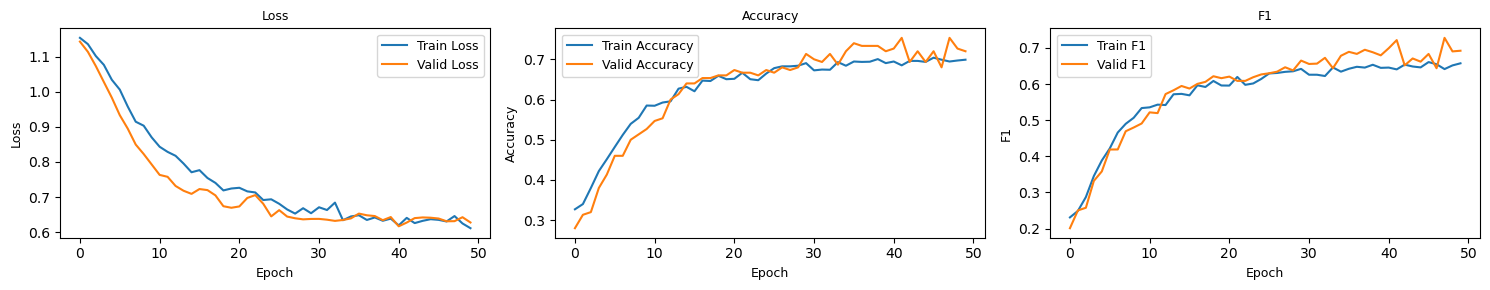

../../dataset/SafeExplain/mobile/model_40.pt


In [10]:
num_epochs = 50
lr = 1e-5
warmup_epochs=15

model_save_directory = "../../dataset/SafeExplain/mobile/"
utils.create_directory(model_save_directory)
utils.delete_subfolders(model_save_directory)
model = MobileNetV2(num_class)
trainer = ModelTrainer()
best_val_file = trainer.train(model, train_loader, valid_loader, model_save_directory, num_epochs=num_epochs, lr=lr, warmup_epochs=warmup_epochs)

../../dataset/SafeExplain/vit/ aready exist.
Sub folders of ../../dataset/SafeExplain/vit/ was deleted.
Epoch: 0 | Validation Accuracy: 0.3133 | Loss: 1.0827 | F1: 0.3154
Epoch: 1 | Validation Accuracy: 0.5733 | Loss: 0.9686 | F1: 0.5264
Epoch: 2 | Validation Accuracy: 0.6267 | Loss: 0.8667 | F1: 0.5533
Epoch: 3 | Validation Accuracy: 0.6067 | Loss: 0.8411 | F1: 0.5465
Epoch: 4 | Validation Accuracy: 0.6533 | Loss: 0.7742 | F1: 0.6235
Epoch: 5 | Validation Accuracy: 0.7067 | Loss: 0.7741 | F1: 0.6467
Epoch: 6 | Validation Accuracy: 0.7133 | Loss: 0.6755 | F1: 0.6856
Epoch: 7 | Validation Accuracy: 0.7267 | Loss: 0.7473 | F1: 0.6925
Epoch: 8 | Validation Accuracy: 0.7067 | Loss: 0.7171 | F1: 0.6612
Epoch: 9 | Validation Accuracy: 0.7333 | Loss: 0.6701 | F1: 0.7108
Epoch: 10 | Validation Accuracy: 0.5933 | Loss: 0.8270 | F1: 0.4755
Epoch: 11 | Validation Accuracy: 0.7333 | Loss: 0.6543 | F1: 0.7034
Epoch: 12 | Validation Accuracy: 0.7400 | Loss: 0.6711 | F1: 0.7120
Epoch: 13 | Validation

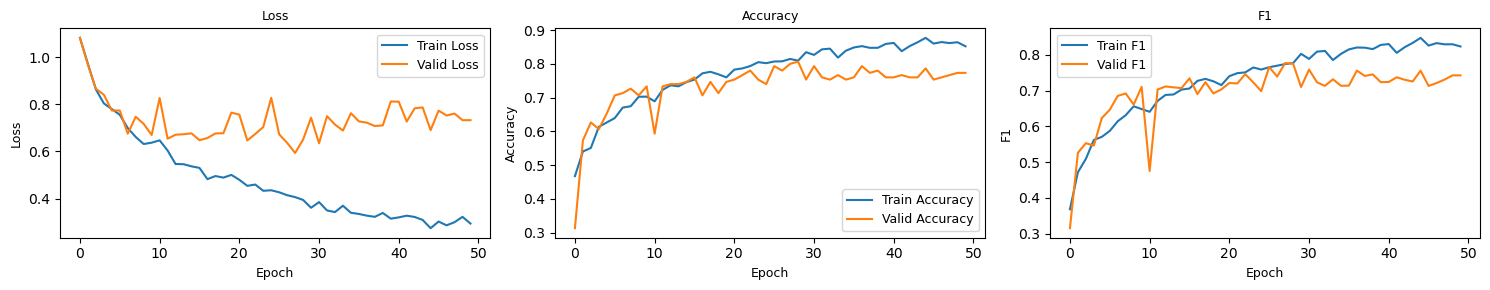

../../dataset/SafeExplain/vit/model_27.pt


In [5]:
num_epochs = 50
lr = 1e-5
warmup_epochs=5

model_save_directory = "../../dataset/SafeExplain/vit/"
utils.create_directory(model_save_directory)
utils.delete_subfolders(model_save_directory)
model = ViT16(num_class)
trainer = ModelTrainer()
best_val_file = trainer.train(model, train_loader, valid_loader, model_save_directory, num_epochs=num_epochs, lr=lr, warmup_epochs=warmup_epochs)